In [1]:
# For analysis and numerical functions
import pandas as pd
import numpy as np

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings(action='ignore')

# For modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

## Dataset Loading

In [2]:
# Importing all datasets
df= pd.read_csv(r"C:\Users\KARTIKEY\Downloads\Day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,703,04-12-2019,4,1,12,0,2,1,1,19.5,23.5,73.4,11.7,551,6055,6606
1,702,03-12-2019,4,1,12,0,1,1,1,18.6,22.8,76.8,5.5,555,5679,6234
2,704,05-12-2019,4,1,12,0,3,1,1,18.0,21.4,48.5,21.7,331,5398,5729
3,710,11-12-2019,4,1,12,0,2,1,2,14.5,16.9,59.7,19.8,282,5219,5501
4,713,14-12-2019,4,1,12,0,5,1,1,11.5,14.7,64.3,8.8,429,5182,5611


# Inspecting the Dataframe

In [3]:
# The dimensions of the dataframe
df.shape

(730, 16)

In [4]:
# The statistical aspects of the dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319726,23.726712,62.767534,12.764795,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.507048,8.149046,14.239872,5.195805,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.400000,4.000000,0.000000,1.500000,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.800000,16.900000,52.000000,9.000000,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.450000,24.350000,62.650000,12.100000,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.900000,30.475000,73.000000,15.600000,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.300000,42.000000,97.300000,34.000000,3410.000000,6946.000000,8714.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Missing Value Check

In [6]:
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### It concludes that features'instant','dteday','casual','registered' impart no contribution in analysis so they shall be dropped.

### Dropping unnecessary columns

In [7]:
df1=df.drop(['instant','dteday','casual', 'registered'], axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,4,1,12,0,2,1,1,19.5,23.5,73.4,11.7,6606
1,4,1,12,0,1,1,1,18.6,22.8,76.8,5.5,6234
2,4,1,12,0,3,1,1,18.0,21.4,48.5,21.7,5729
3,4,1,12,0,2,1,2,14.5,16.9,59.7,19.8,5501
4,4,1,12,0,5,1,1,11.5,14.7,64.3,8.8,5611


In [8]:
df1.shape

(730, 12)

### Data shows that "season," "yr," "mnth," "holiday," "weekday," "workingday," and "weathersit" are all categorical variables.
### We will substitute the relevant values for each feature accordingly.

In [9]:
# Mapping season column
df1['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)

In [87]:
# Mapping the year column
df1['yr'].replace({0: "2018", 1:"2019"}, inplace=True)

In [78]:
# Mapping mnth column
df1["mnth"].replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'},inplace= True)

In [79]:
# Mapping weekday column
df1['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

In [80]:
# Mapping weathersit column
df1['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",
                          4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)

In [81]:
# check the head of the dataset after mapping the categorical columns
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,winter,2018,dec,0,Tuesday,1,Clear_Few Clouds,19.5,23.5,73.4,11.7,6606
1,winter,2018,dec,0,Monday,1,Clear_Few Clouds,18.6,22.8,76.8,5.5,6234
2,winter,2018,dec,0,Wednesday,1,Clear_Few Clouds,18.0,21.4,48.5,21.7,5729
3,winter,2018,dec,0,Tuesday,1,Mist_cloudy,14.5,16.9,59.7,19.8,5501
4,winter,2018,dec,0,Friday,1,Clear_Few Clouds,11.5,14.7,64.3,8.8,5611


## Exploratory Data Analysis

In [82]:
df1.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          252
atemp         283
hum           392
windspeed     209
cnt           695
dtype: int64

In [83]:
cat_cols=['season','yr','mnth','holiday','weekday','workingday','weathersit']
cont_cols=['temp','atemp','hum','windspeed']
target=['cnt']
len(cat_cols)+len(cont_cols)+len(target)

12

## Univariate Analysis

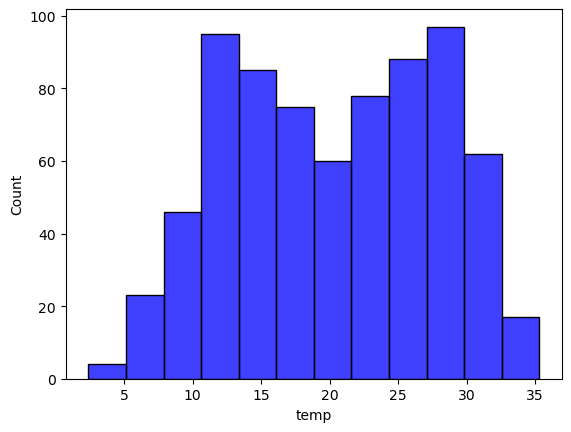

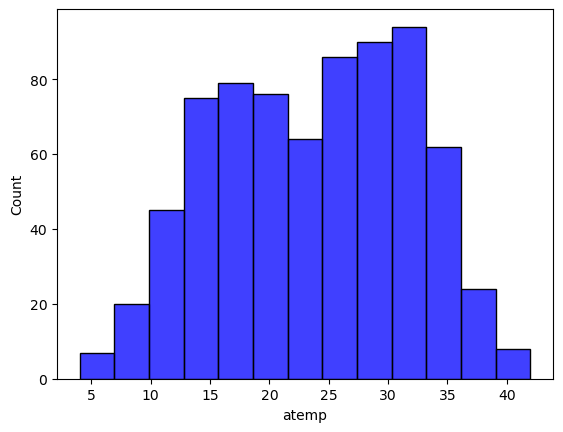

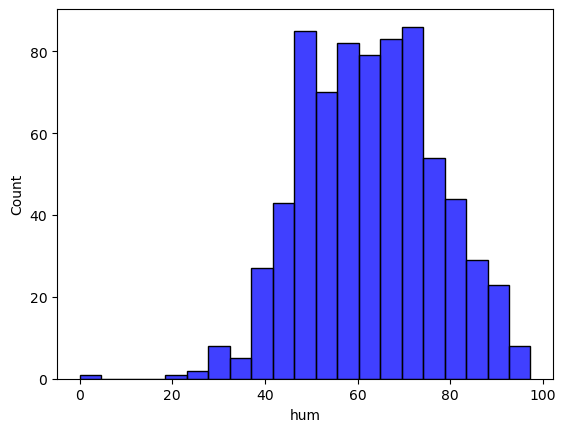

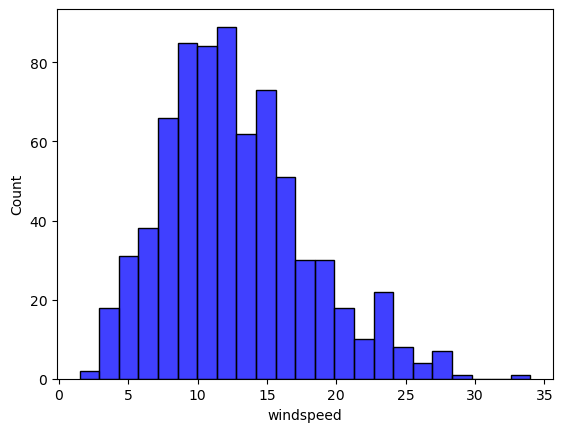

In [84]:
for i in cont_cols:
    sns.histplot(df1[i], color="blue")
    plt.show()

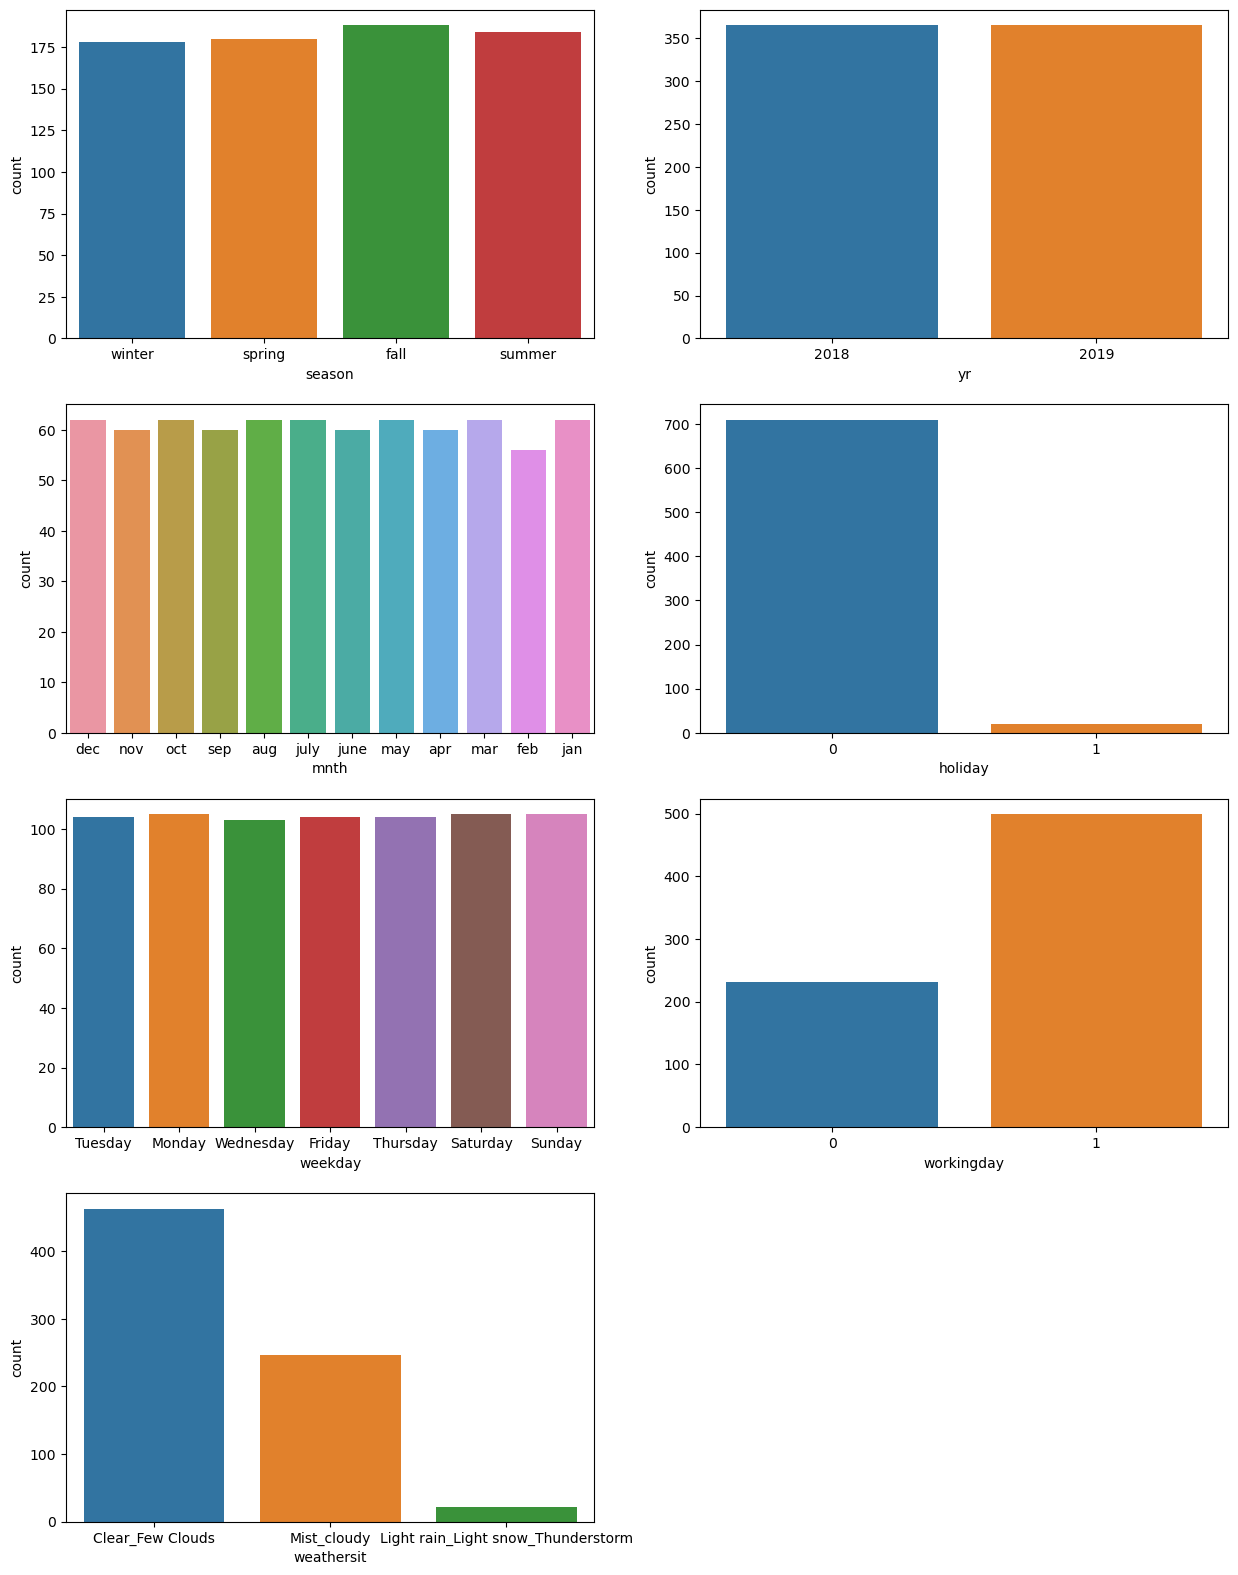

In [85]:
plt.figure(figsize = (15,35))
i = 1
for col in cat_cols:
    plt.subplot(7,2,i)
    sns.countplot(x = col , data = df1)
    i += 1
plt.show()

In [104]:
# function to create barplot related to categorical columns

import matplotlib.pyplot as plt
import seaborn as sns

def cat_columns_viz(column):
    plt.figure(figsize=(14, 8))
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=df1)
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=df1, hue='yr', palette=['red', 'blue'])
    plt.legend(labels=['2018', '2019'])
    plt.show()

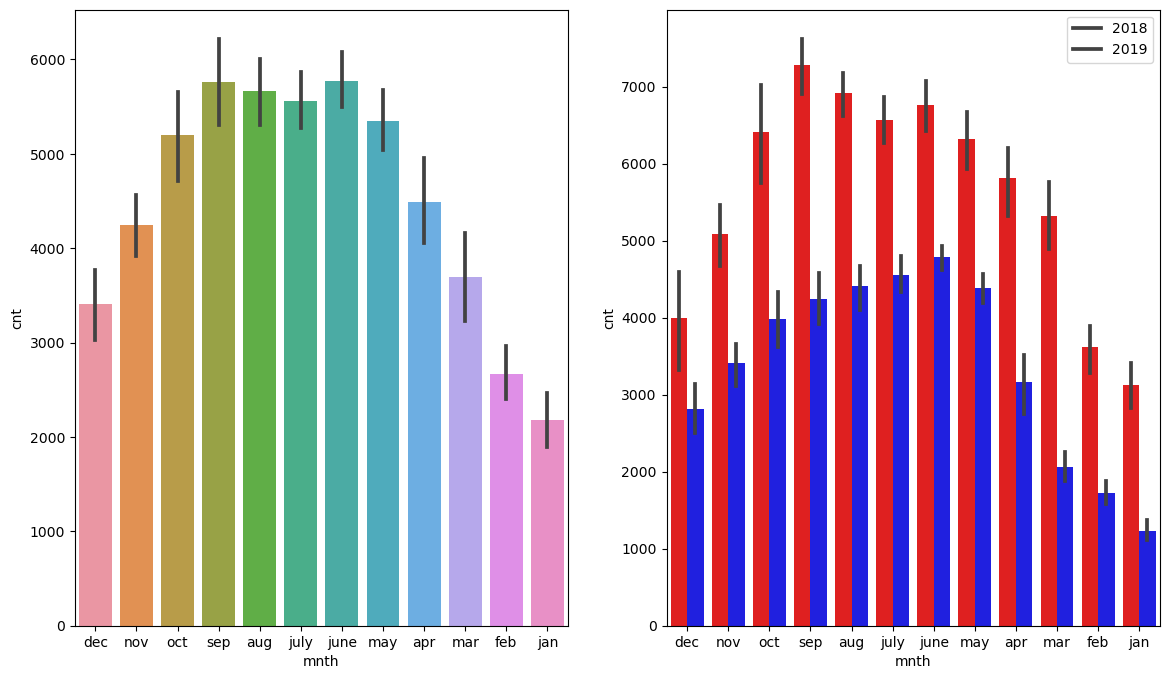

In [105]:
# Plotting a mnth column's visualization

cat_columns_viz('mnth')

Most reservations were made in the months of May, June, July, August, September, and October.Beginning in January and continuing through mid-year, the trend grew before beginning to decline as the year came to a close.
From 2018 to 2019, the number of reservations for each month appears to have grown.


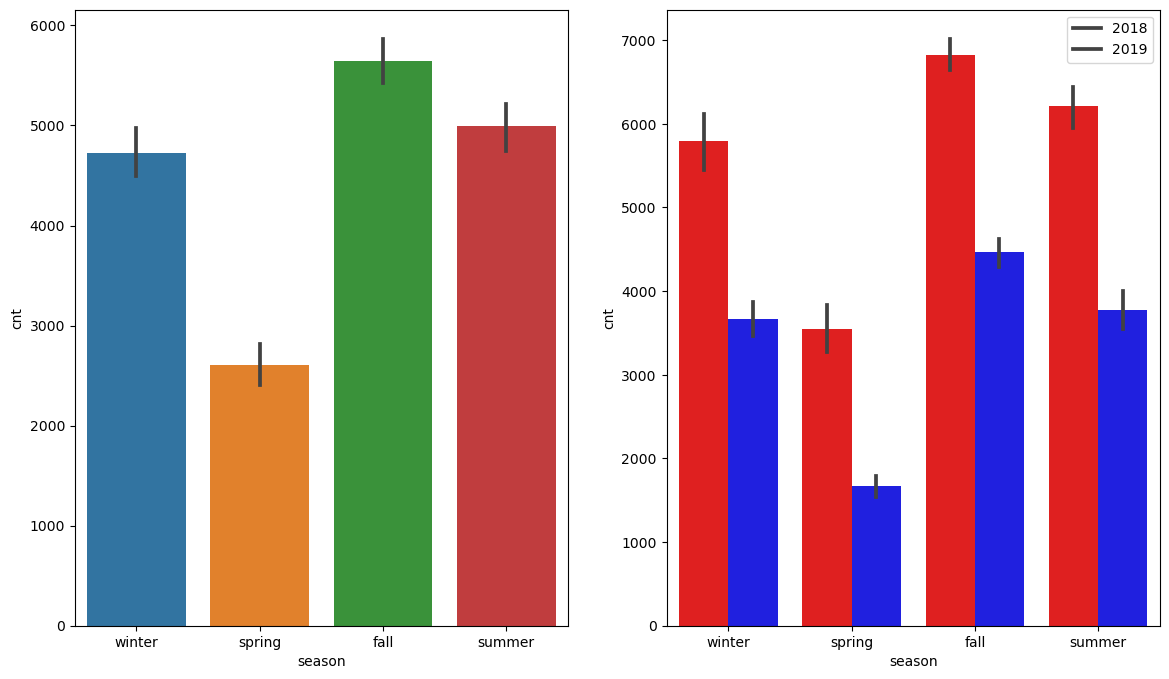

In [88]:
# Plotting a season column's visualization

cat_columns_viz('season')

The number of reservations seems to have risen over the fall season. Additionally, each season's number of bookings dramatically increased from 2018 to 2019.


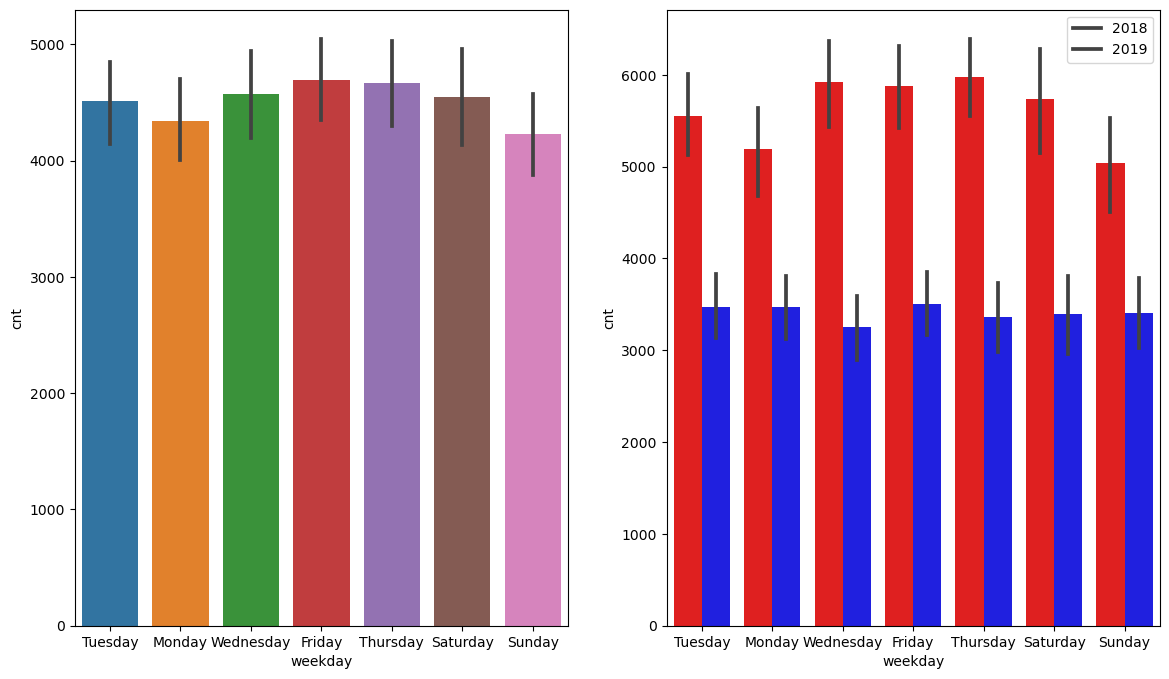

In [90]:
# Plotting a weekday column's visualization

cat_columns_viz('weekday')

Bookings are higher on Thursday, Friday, Saturday, and Sunday than at the beginning of the week.

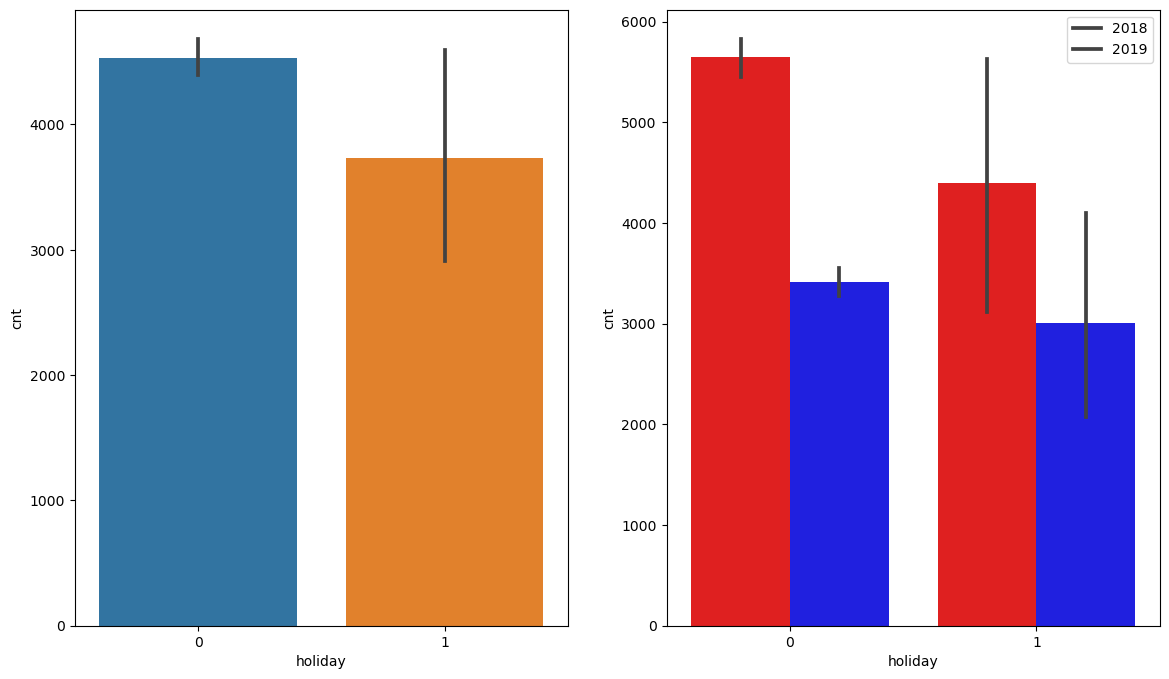

In [92]:
# Plotting a holiday column's visualization

cat_columns_viz('holiday')

Bookings appear to be less frequent when it's not a holiday, which makes sense given that on holidays, people would wish to relax with their families at home.

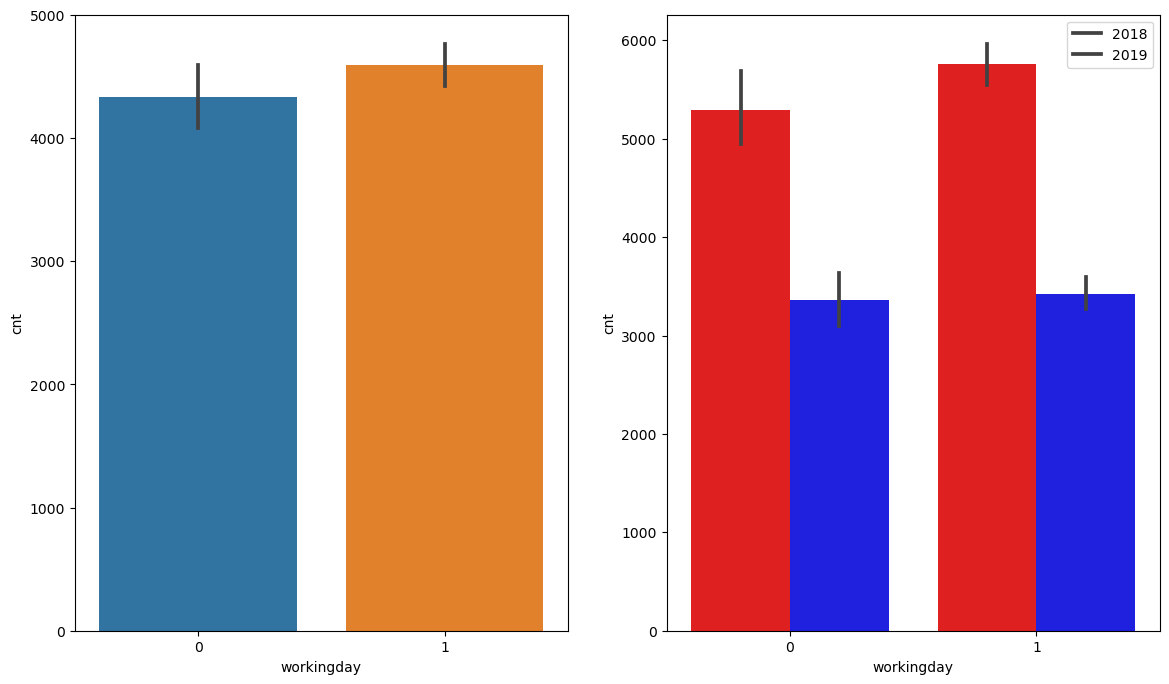

In [96]:
# Plotting a workingday column's visualization

cat_columns_viz('workingday')

#Both working days and non-working days looked to have about the same amount of bookings. However, the number rose from 2018 to 2019.

## Bivariate Analysis

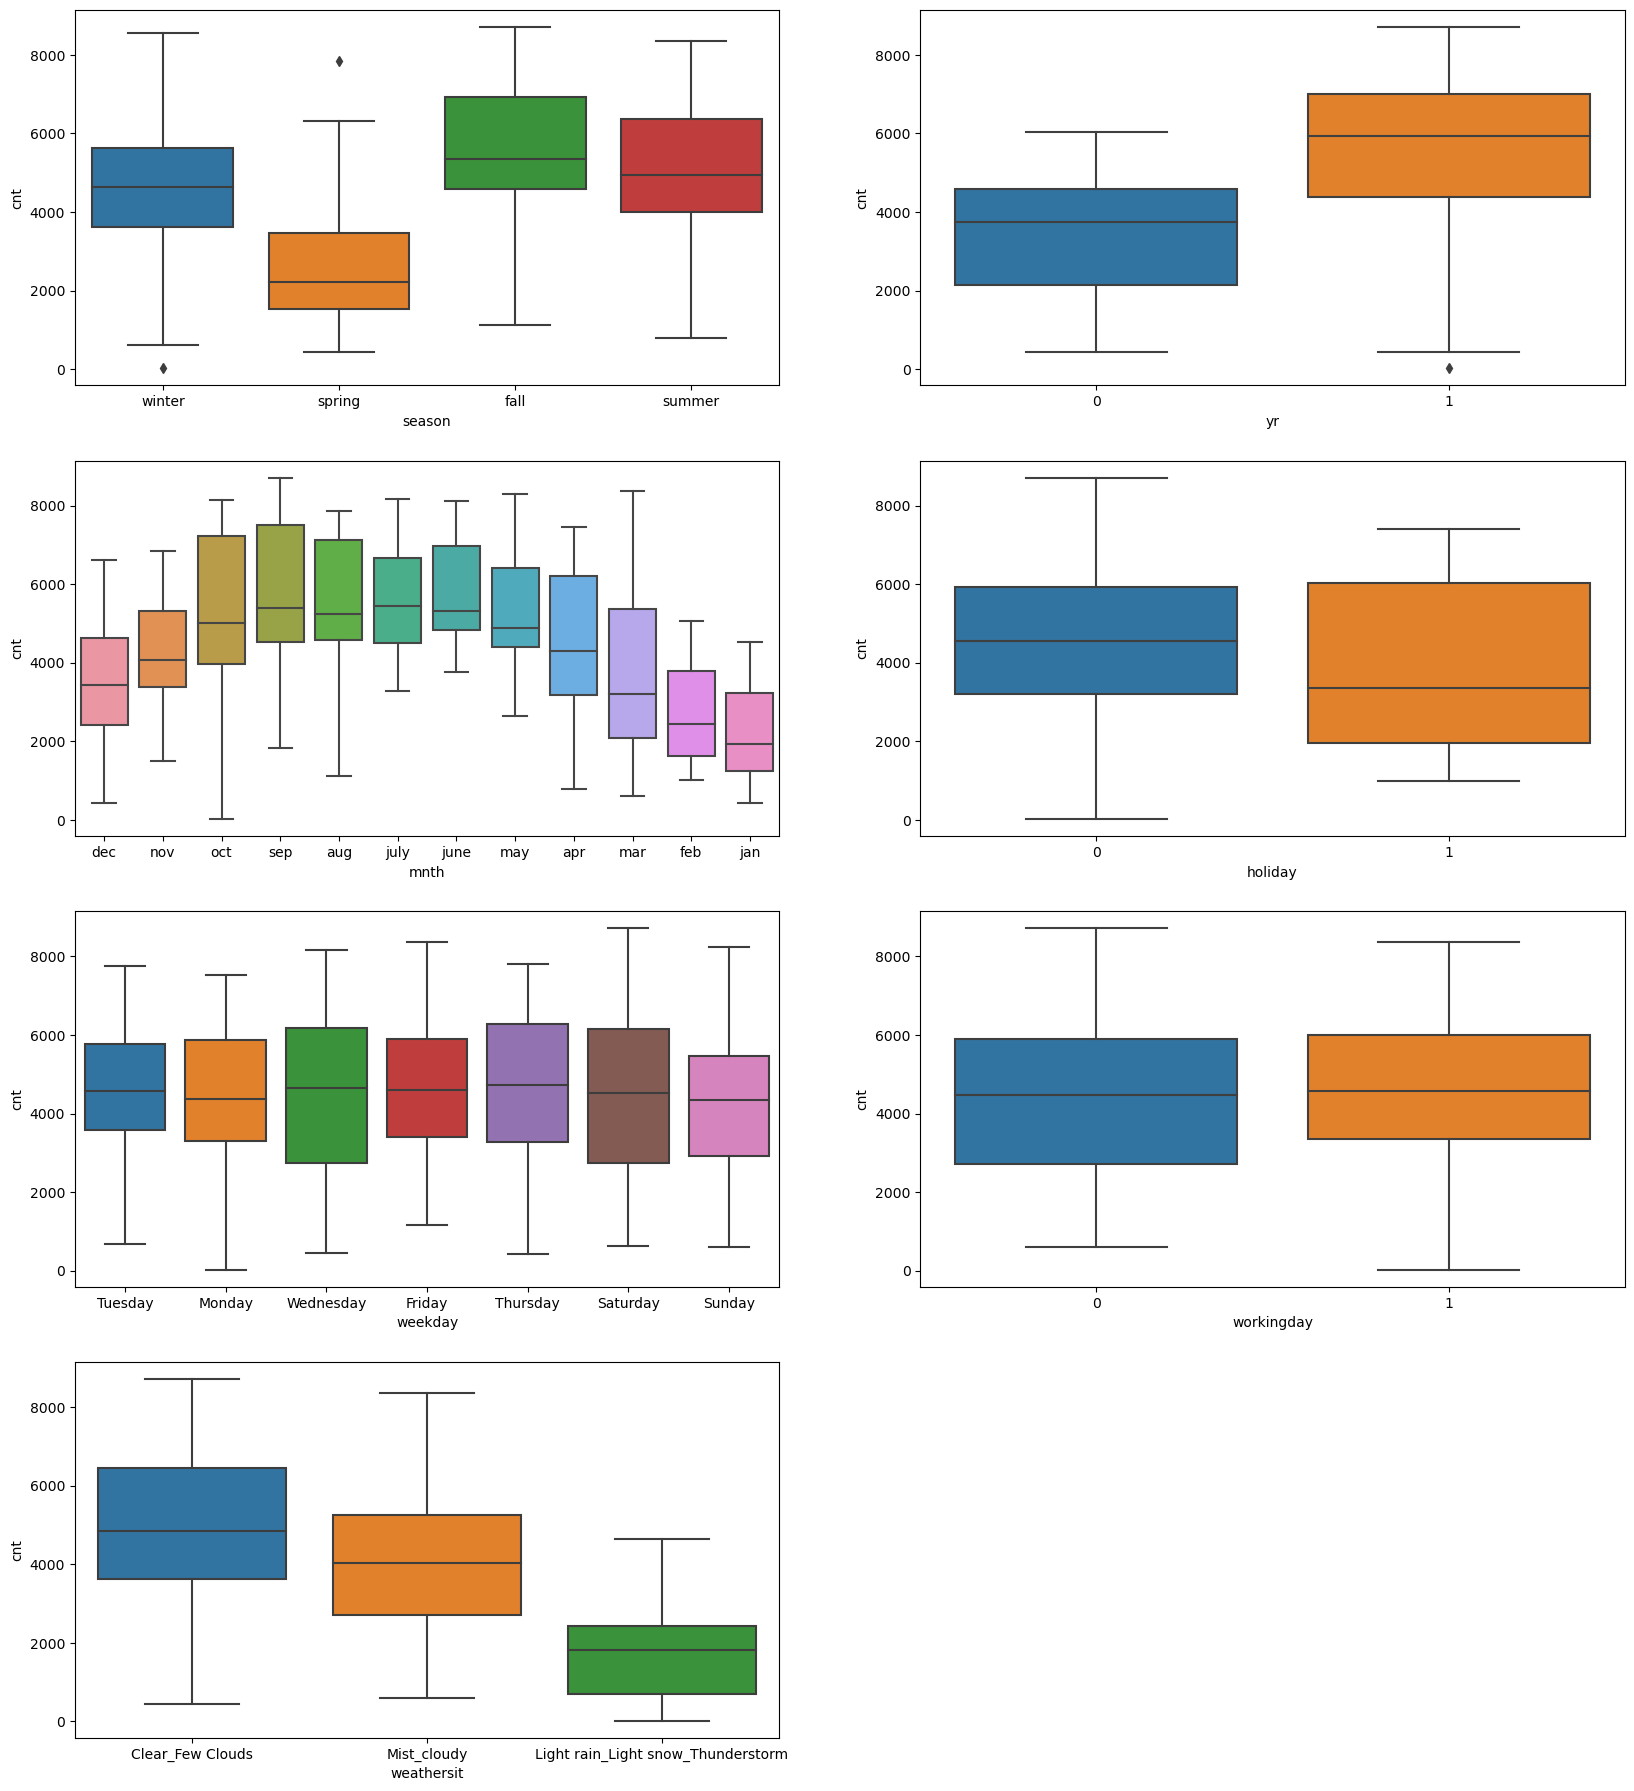

In [20]:
plt.figure(figsize = (20,40)) 
i = 1
for col in cat_cols:
    plt.subplot(7,2,i)
    sns.boxplot(x = col ,y="cnt", data = df1)
    i += 1
plt.show()

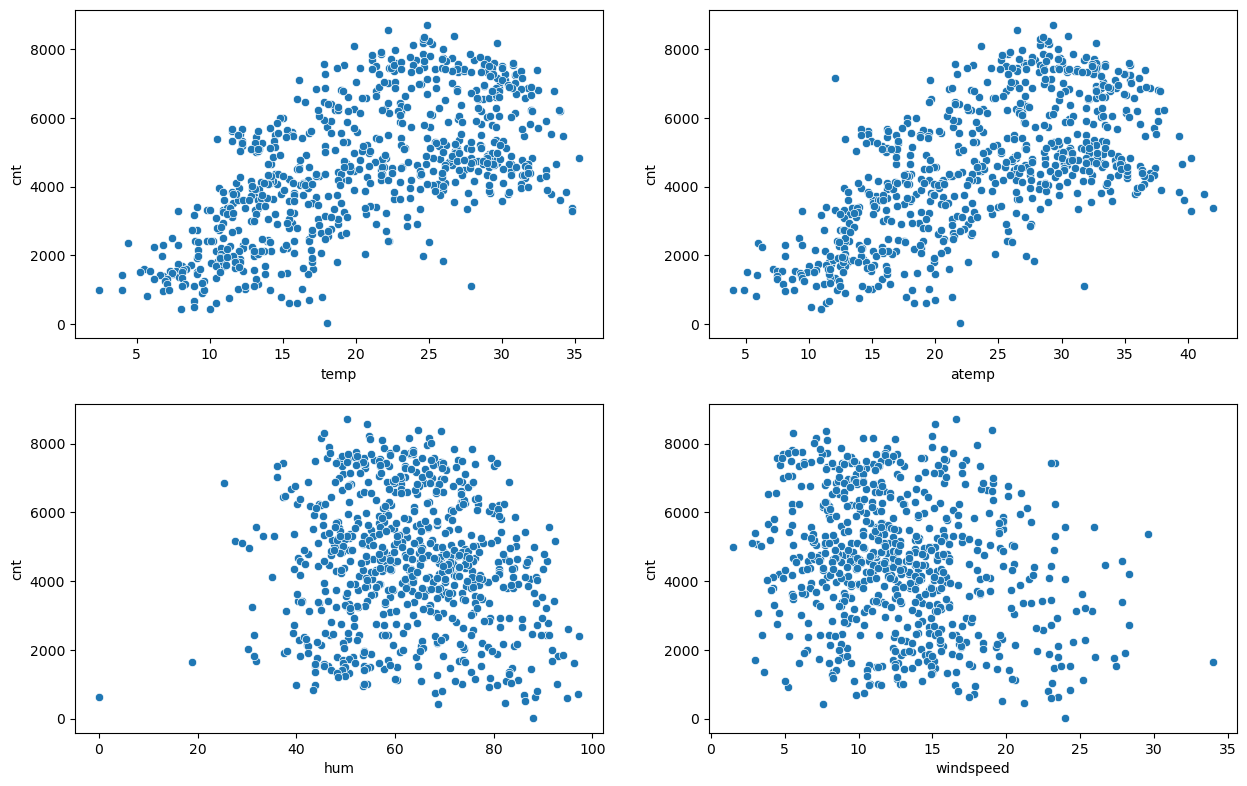

In [21]:
plt.figure(figsize = (15,35))
i = 1
for col in cont_cols:
    plt.subplot(7,2,i)
    sns.scatterplot(x = col ,y="cnt", data = df1)
    i += 1
plt.show()

## Multrivate Analysis

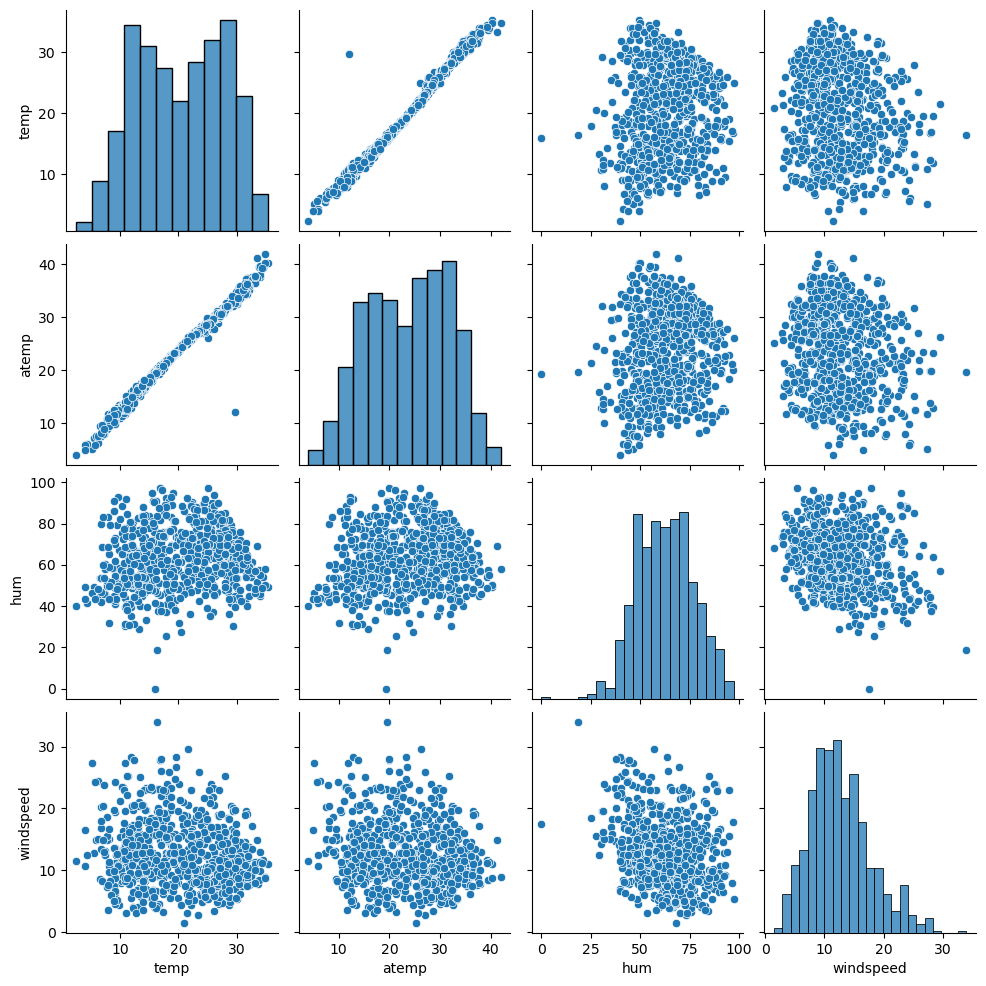

In [22]:
sns.pairplot(df1[cont_cols])
plt.show()

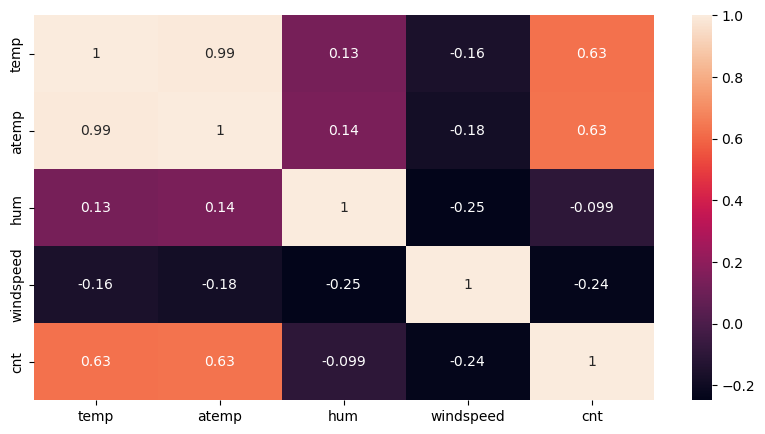

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(df1[cont_cols+["cnt"]].corr(),annot=True)
plt.show()

## The analysis findings can be summarized as follows:

1. Temperature and Bike Rentals:
   - There is a positive correlation between temperature and the count of total rental bikes.
   - As the temperature increases, the number of people renting bikes also increases.
   - Warmer temperatures are associated with higher bike rental activity.

2. Humidity and Bike Rentals:
   - There is a positive relationship between humidity and bike rentals.
   - Higher humidity levels are linked to a greater number of individuals renting bikes.
   - Bike rental activity tends to be higher during rainy seasons or periods of increased humidity.

3. Windspeed and Bike Rentals:
   - Low windspeed conditions are preferred by individuals renting bikes.
   - Bike rentals decrease as windspeed increases.
   - This suggests that people are more cautious and may avoid biking during higher windspeeds to reduce the risk of accidents.

In conclusion, the bivariate analysis demonstrates that temperature and humidity positively influence the count of total rental bikes, while windspeed has a negative impact. The results suggest that individuals are more inclined to rent bikes during warmer temperatures and periods of higher humidity, likely associated with favorable weather conditions. Moreover, they tend to avoid biking during higher windspeeds, potentially to ensure their safety and prevent accidents.

###  Data Preparation

In [24]:
# Only for non binary categorical columns
df1[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [25]:
#Dummy variables for season, mnth, weekday, weathersit
dum1=pd.get_dummies(df1.season,drop_first=True)
dum2=pd.get_dummies(df1.mnth,drop_first=True)
dum3=pd.get_dummies(df1.weekday,drop_first=True)
dum4=pd.get_dummies(df1.weathersit,drop_first=True)

In [26]:
# Combining the results to dataframe
bike=pd.concat([dum1,dum2,dum3,dum4,df1],axis=1)
bike.head()

,spring,summer,winter,aug,dec,feb,jan,july,june,mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,1,0,1,0,0,0,0,0,...,dec,0,Tuesday,1,Clear_Few Clouds,19.5,23.5,73.4,11.7,6606
1,0,0,1,0,1,0,0,0,0,0,...,dec,0,Monday,1,Clear_Few Clouds,18.6,22.8,76.8,5.5,6234
2,0,0,1,0,1,0,0,0,0,0,...,dec,0,Wednesday,1,Clear_Few Clouds,18.0,21.4,48.5,21.7,5729
3,0,0,1,0,1,0,0,0,0,0,...,dec,0,Tuesday,1,Mist_cloudy,14.5,16.9,59.7,19.8,5501
4,0,0,1,0,1,0,0,0,0,0,...,dec,0,Friday,1,Clear_Few Clouds,11.5,14.7,64.3,8.8,5611


In [27]:
# Drop 'season','mnth','weekday','weathersit' 
bike.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
bike.head()

,spring,summer,winter,aug,dec,feb,jan,july,june,mar,...,Light rain_Light snow_Thunderstorm,Mist_cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,19.5,23.5,73.4,11.7,6606
1,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,18.6,22.8,76.8,5.5,6234
2,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,18.0,21.4,48.5,21.7,5729
3,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,14.5,16.9,59.7,19.8,5501
4,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,11.5,14.7,64.3,8.8,5611


## Train Test Split

In [28]:
x=bike.drop(["cnt"],axis=1)
y=bike["cnt"]

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [30]:
x_train.shape

(511, 29)

In [31]:
x_test.shape

(219, 29)

## Scaling

In [32]:
#Instantiate an object
scaler = MinMaxScaler()

In [33]:
x_train[cont_cols] = scaler.fit_transform(x_train[cont_cols])
x_train.head()

,spring,summer,winter,aug,dec,feb,jan,july,june,mar,...,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed
653,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0.118211,0.104972,0.450154,0.503226
576,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0.191693,0.193370,0.520041,0.396774
426,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0.789137,0.751381,0.685509,0.122581
728,1,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,1,0.156550,0.140884,0.886948,0.538710
482,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.565495,0.574586,0.649538,0.064516


In [34]:
x_test[cont_cols] = scaler.transform(x_test[cont_cols])

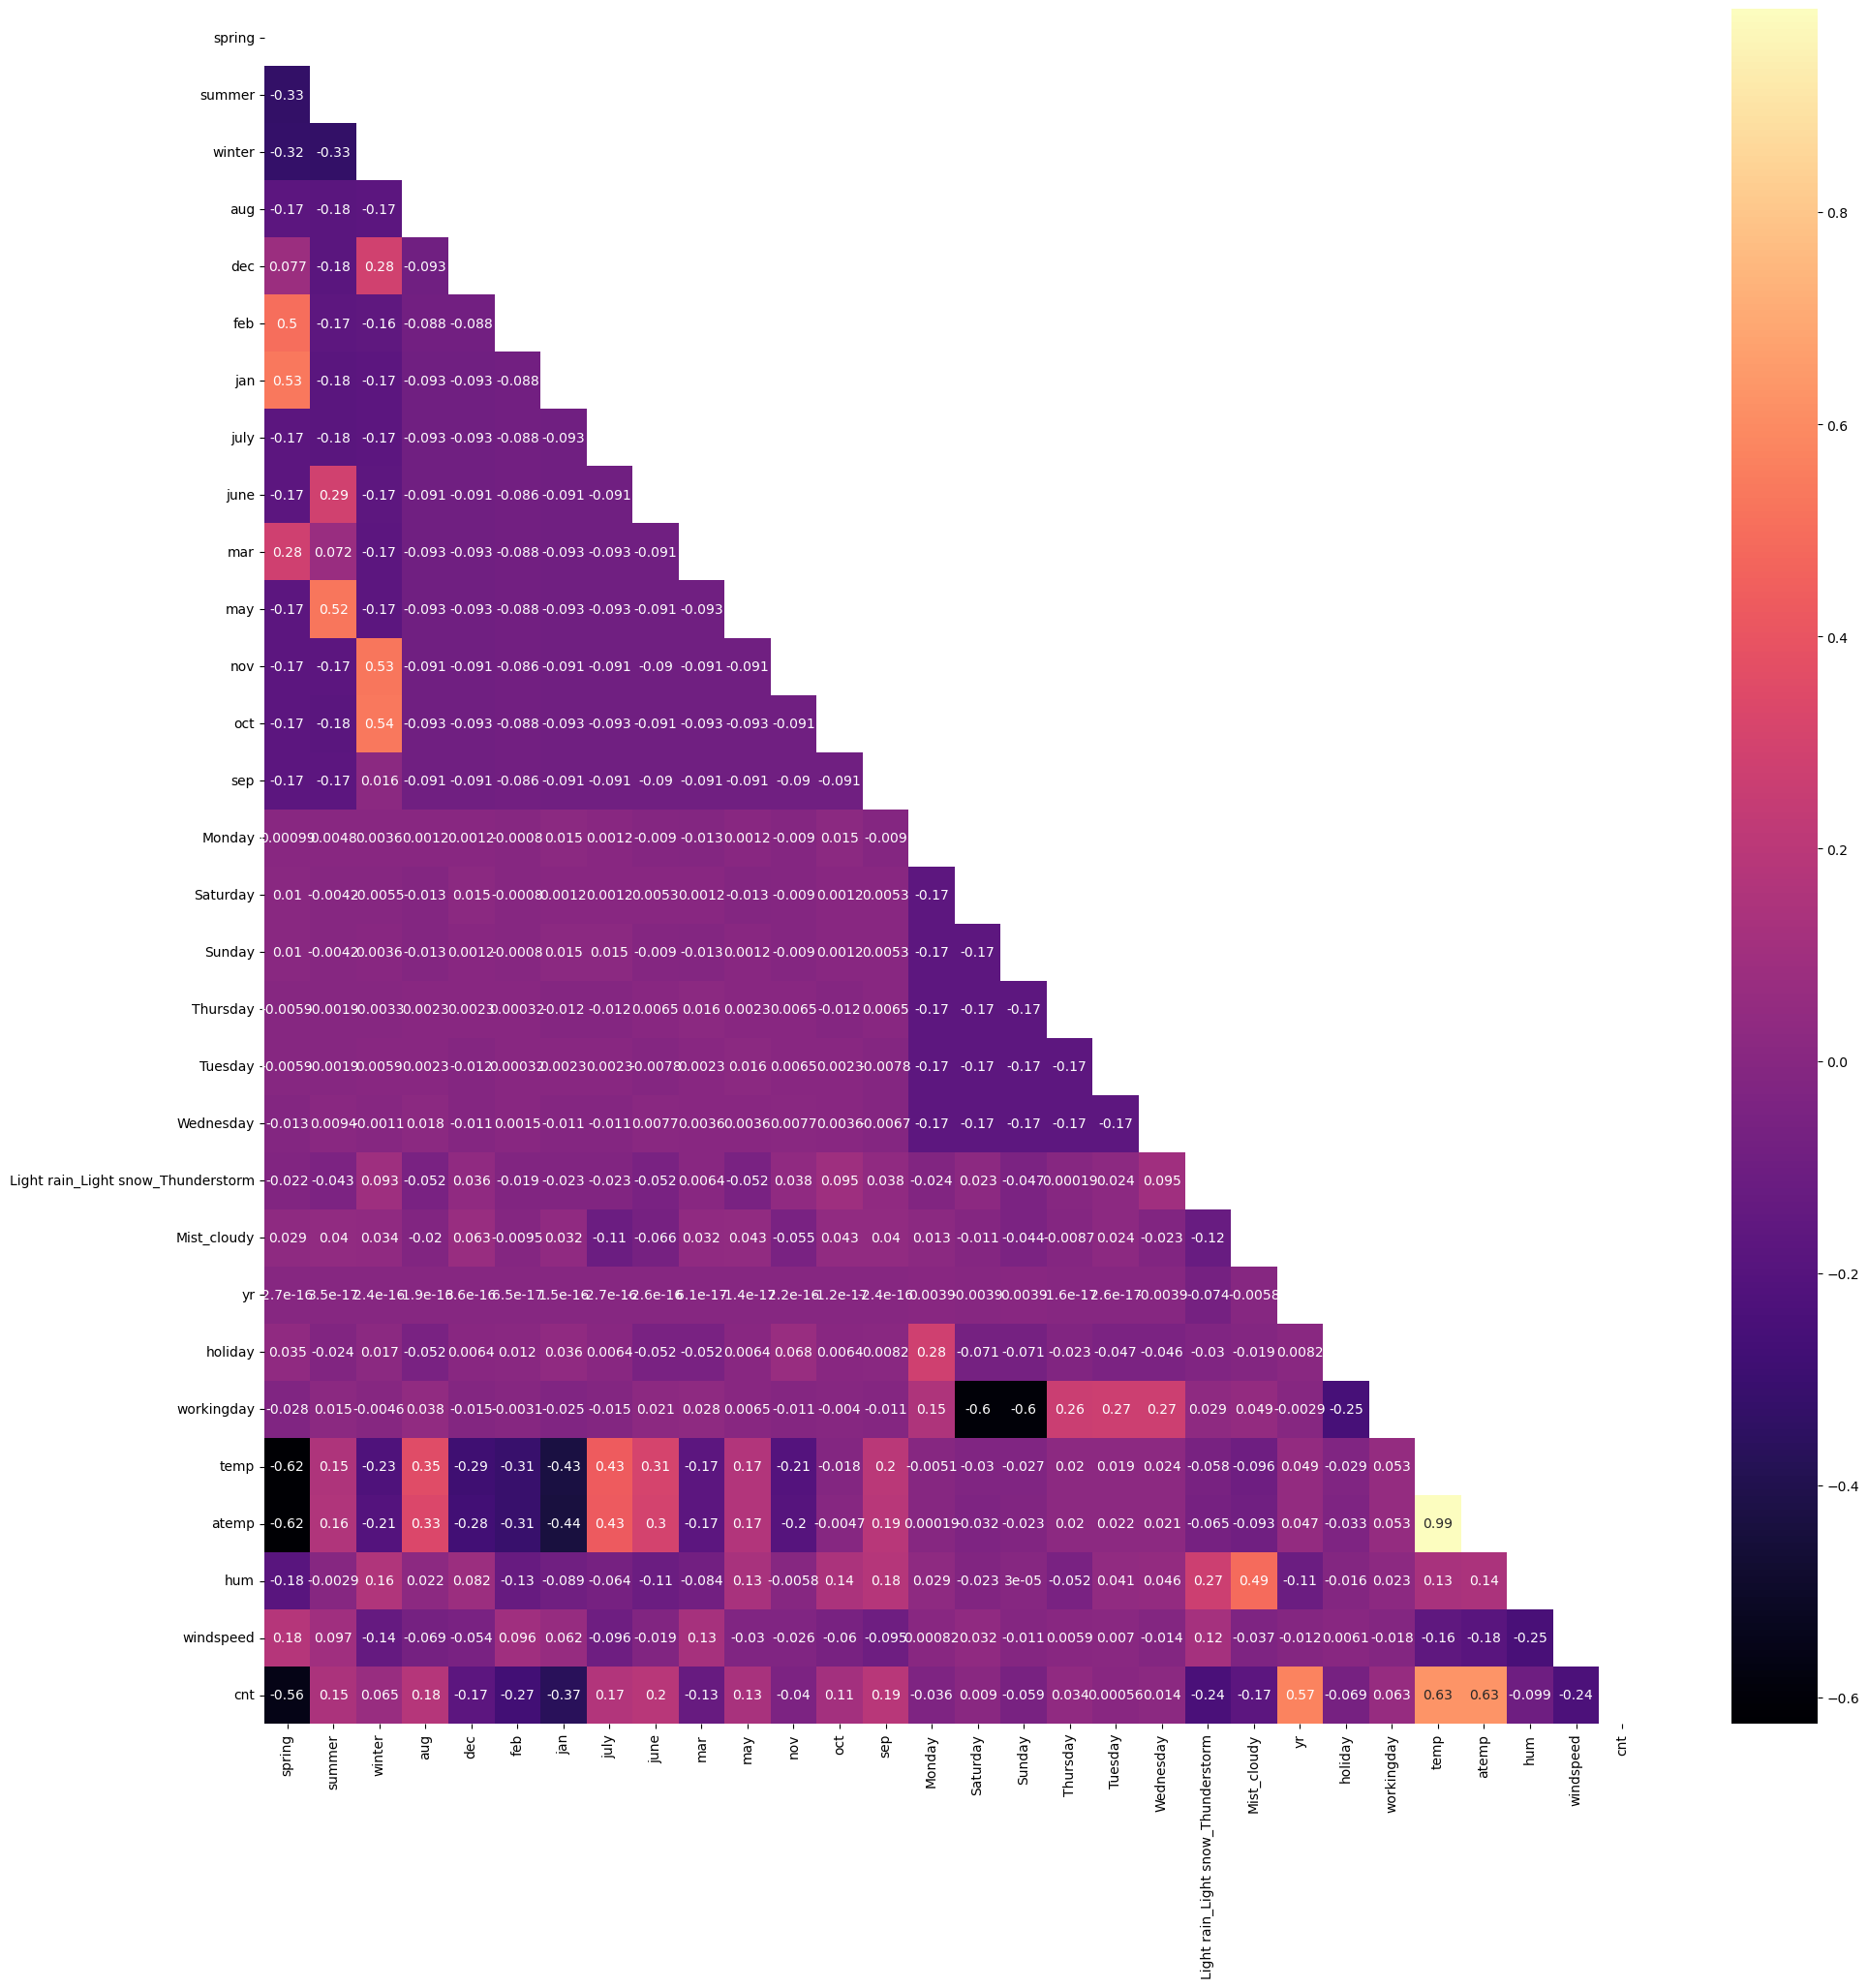

In [35]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(23,23))
matrix = np.triu(bike.corr())
sns.heatmap(bike.corr(), annot=True, cmap="magma", mask=matrix)
plt.show()


## Modelling

### Feature Selection - Recursive Feature Eimination

In [36]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)

selector=selector.fit(x_train,y_train)
selected_features=list(x_train.columns[selector.support_])
selected_features

['spring',
 'winter',
 'dec',
 'july',
 'nov',
 'Saturday',
 'Light rain_Light snow_Thunderstorm',
 'Mist_cloudy',
 'yr',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'hum',
 'windspeed']

In [37]:
x_train=x_train[selected_features]
x_test=x_test[selected_features]

In [38]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

### First linear regression model

In [39]:
model1=sm.OLS(y_train,x_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.7
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          3.98e-186
Time:                        09:33:18   Log-Likelihood:                -4121.9
No. Observations:                 511   AIC:                             8276.
Df Residuals:                     495   BIC:                             8343.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               3141.0502    284.391     11.045      0.000    2582.288    3699.812
spring                             -1107.8604    129.509     -8.554      0.000   -1362.315    -853.406
winter                               711.4235    125.040      5.690      0.000     465.750     957.097
dec                                 -529.6261    143.259     -3.697      0.000    -811.096    -248.156
july                                -707.0833    139.277     -5.077      0.000    -980.729    -433.437
nov                                 -598.7251    165.548     -3.617      0.000    -923.989    -273.462
Saturday                             379.6944    133.357      2.847      0.005     117.680     641.709
Light rain_Light snow_Thunderstorm -1977.1123    223.180     -8.859      0.000   -2415.609   -1538.616
Mist_cloudy                         -588.5965     95.102     -6.189      0.000    -775.449    -401.744
yr                                  1962.2073     71.002     27.636      0.000    1822.704    2101.710
holiday                             -503.8676    223.810     -2.251      0.025    -943.603     -64.133
workingday                           396.8154    101.405      3.913      0.000     197.578     596.053
temp                                2119.6395   1043.733      2.031      0.043      68.947    4170.332
atemp                               1512.0873   1095.191      1.381      0.168    -639.709    3663.884
hum                                -1434.5485    325.881     -4.402      0.000   -2074.829    -794.268
windspeed                          -1351.3755    228.599     -5.912      0.000   -1800.520    -902.231
==============================================================================
Omnibus:                       84.711   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.198
Skew:                          -0.904   Prob(JB):                     2.02e-39
Kurtosis:                       5.259   Cond. No.                         77.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Variance Inflation Factor

In [40]:
# Generic function to calculate VIF of variables

def cal_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [41]:
cal_VIF(x_train)

,Features,VIF
12,atemp,310.36
11,temp,299.45
13,hum,23.40
10,workingday,5.36
14,windspeed,4.16
1,winter,2.88
0,spring,2.79
7,Mist_cloudy,2.39
8,yr,2.10
5,Saturday,1.79


In [42]:
# As humidity shows high VIF values hence we can drop it
x_train=x_train.drop(["hum"],axis=1)
x_test=x_test.drop(["hum"],axis=1)

In [43]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

### Second linear regression model

In [44]:
model2=sm.OLS(y_train,x_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     178.2
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          3.75e-183
Time:                        09:33:19   Log-Likelihood:                -4131.7
No. Observations:                 511   AIC:                             8293.
Df Residuals:                     496   BIC:                             8357.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               2342.6757    223.077     10.502      0.000    1904.383    2780.968
spring                             -1144.2321    131.618     -8.694      0.000   -1402.829    -885.635
winter                               639.4299    126.241      5.065      0.000     391.397     887.463
dec                                 -591.5091    145.185     -4.074      0.000    -876.762    -306.256
july                                -635.6561    140.868     -4.512      0.000    -912.427    -358.885
nov                                 -623.2469    168.492     -3.699      0.000    -954.292    -292.201
Saturday                             433.6379    135.230      3.207      0.001     167.943     699.333
Light rain_Light snow_Thunderstorm -2408.6473    204.178    -11.797      0.000   -2809.808   -2007.486
Mist_cloudy                         -842.9104     76.930    -10.957      0.000    -994.059    -691.762
yr                                  2013.9246     71.309     28.242      0.000    1873.820    2154.029
holiday                             -512.8370    227.909     -2.250      0.025    -960.624     -65.050
workingday                           424.4709    103.068      4.118      0.000     221.967     626.975
temp                                2072.0422   1062.836      1.950      0.052     -16.174    4160.259
atemp                               1280.3185   1114.007      1.149      0.251    -908.436    3469.073
windspeed                          -1077.1995    223.989     -4.809      0.000   -1517.283    -637.116
==============================================================================
Omnibus:                       88.677   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.494
Skew:                          -0.922   Prob(JB):                     2.15e-43
Kurtosis:                       5.414   Cond. No.                         71.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Run the function to calculate VIF for the new model
cal_VIF(x_train)

,Features,VIF
12,atemp,300.93
11,temp,299.45
10,workingday,5.16
13,windspeed,4.15
1,winter,2.54
8,yr,2.10
0,spring,2.06
5,Saturday,1.76
4,nov,1.75
7,Mist_cloudy,1.60


In [46]:
# As temp shows very high VIF values hence we can drop it
x_train=x_train.drop(["temp"],axis=1)
x_test=x_test.drop(["temp"],axis=1)

In [47]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

### Second linear regression model

In [48]:
model3=sm.OLS(y_train,x_train_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.5
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          1.75e-183
Time:                        09:33:19   Log-Likelihood:                -4133.6
No. Observations:                 511   AIC:                             8295.
Df Residuals:                     497   BIC:                             8355.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               2334.5876    223.666     10.438      0.000    1895.140    2774.035
spring                             -1182.6458    130.500     -9.062      0.000   -1439.046    -926.245
winter                               606.3215    125.446      4.833      0.000     359.852     852.791
dec                                 -613.4026    145.157     -4.226      0.000    -898.599    -328.206
july                                -613.5266    140.805     -4.357      0.000    -890.172    -336.881
nov                                 -645.3330    168.583     -3.828      0.000    -976.557    -314.109
Saturday                             443.6703    135.512      3.274      0.001     177.422     709.918
Light rain_Light snow_Thunderstorm -2390.5695    204.541    -11.687      0.000   -2792.442   -1988.697
Mist_cloudy                         -847.3298     77.113    -10.988      0.000    -998.837    -695.822
yr                                  2020.0246     71.441     28.276      0.000    1879.662    2160.388
holiday                             -498.3174    228.429     -2.182      0.030    -947.122     -49.513
workingday                           431.1106    103.302      4.173      0.000     228.149     634.072
atemp                               3387.3337    270.826     12.507      0.000    2855.228    3919.439
windspeed                          -1031.4625    223.384     -4.617      0.000   -1470.355    -592.570
==============================================================================
Omnibus:                       87.920   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.567
Skew:                          -0.902   Prob(JB):                     1.70e-44
Kurtosis:                       5.492   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Run the function to calculate VIF for the new model
cal_VIF(x_train)

,Features,VIF
11,atemp,6.53
10,workingday,5.15
12,windspeed,4.10
1,winter,2.48
8,yr,2.09
0,spring,1.97
5,Saturday,1.76
4,nov,1.74
7,Mist_cloudy,1.60
2,dec,1.40


In [50]:
# As atemp shows high VIF values hence we can drop it
x_train=x_train.drop(["atemp"],axis=1)
x_test=x_test.drop(["atemp"],axis=1)

In [51]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

### Third linear regression model

In [52]:
model3=sm.OLS(y_train,x_train_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.4
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          3.37e-155
Time:                        09:33:19   Log-Likelihood:                -4203.5
No. Observations:                 511   AIC:                             8433.
Df Residuals:                     498   BIC:                             8488.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               4585.6102    152.118     30.145      0.000    4286.739    4884.482
spring                             -2344.5444    104.988    -22.332      0.000   -2550.819   -2138.270
winter                               115.0120    136.468      0.843      0.400    -153.113     383.137
dec                                 -974.2681    162.956     -5.979      0.000   -1294.435    -654.101
july                                  14.5886    150.681      0.097      0.923    -281.461     310.638
nov                                -1040.6562    189.684     -5.486      0.000   -1413.336    -667.976
Saturday                             420.9365    155.213      2.712      0.007     115.984     725.889
Light rain_Light snow_Thunderstorm -2532.5726    233.936    -10.826      0.000   -2992.197   -2072.949
Mist_cloudy                         -919.4710     88.084    -10.439      0.000   -1092.532    -746.410
yr                                  2075.7239     81.675     25.415      0.000    1915.255    2236.193
holiday                             -351.4005    261.314     -1.345      0.179    -864.814     162.013
workingday                           470.7770    118.274      3.980      0.000     238.400     703.154
windspeed                          -1424.4935    253.336     -5.623      0.000   -1922.233    -926.754
==============================================================================
Omnibus:                       62.439   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.264
Skew:                          -0.738   Prob(JB):                     2.54e-25
Kurtosis:                       4.772   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Run the function to calculate VIF for the new model
cal_VIF(x_train)

,Features,VIF
11,windspeed,3.52
10,workingday,3.39
1,winter,2.48
8,yr,1.95
4,nov,1.71
0,spring,1.62
7,Mist_cloudy,1.59
5,Saturday,1.49
2,dec,1.39
3,july,1.16


### We might take into consideration the res_4 model, which appears to have very little multicolinearity between the variables and significant p-values for all of the predictors.
### The whole model is significant, as indicated by the F-statistics value of 147.4 (which is larger than 1) and the p-value of 3.37e-155, which is practically equivalent to zero.

In [54]:
# Calculating R^2 value in terms of percent for the train dataset

predicted_value1=res3.predict(x_train_sm)
print("Train Performance:",round(r2_score(y_train, predicted_value1)*100,2),"%")

Train Performance: 78.03 %


In [55]:
# Calculating R^2 value in terms of percent for the test dataset

predicted_value2=res3.predict(x_test_sm)
print("Test Performance:",round(r2_score(y_test, predicted_value2)*100,2),"%")

Test Performance: 75.17 %


In [56]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2_score(y_test, predicted_value2))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
print(adjusted_r2)

0.7372


## Comparision between Training and Testing dataset:

- Train dataset R^2          : 0.7803
- Test dataset R^2           : 0.7517
- Train dataset Adjusted R^2 : 0.775   
- Test dataset Adjusted R^2  : 0.732

## Model is ready

## Model Evaluation

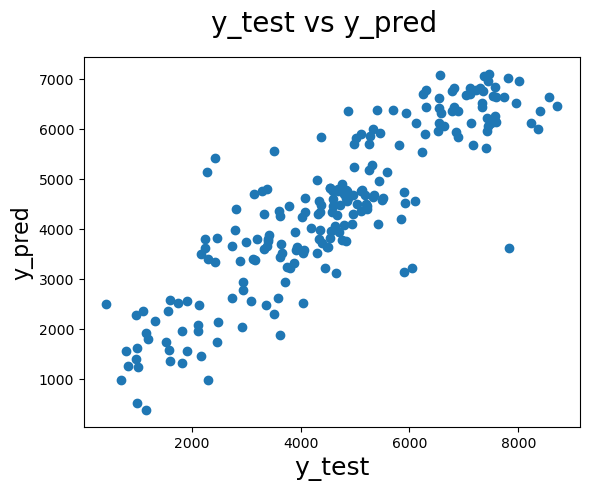

In [57]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,predicted_value2)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

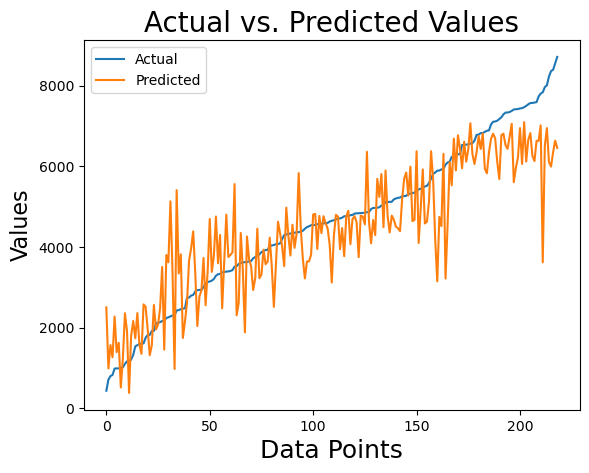

In [68]:
import matplotlib.pyplot as plt

# Reset index for y_test and predicted_value2
y_test_reset = y_test.reset_index(drop=True)
predicted_value2_reset = predicted_value2.reset_index(drop=True)

# Sort the actual and predicted values based on y_test for better visualization
sorted_indices = y_test_reset.argsort()
y_test_sorted = y_test_reset.iloc[sorted_indices]
predicted_value2_sorted = predicted_value2_reset.iloc[sorted_indices]

# Line plot for y_test and y_pred
plt.plot(range(len(y_test_sorted)), y_test_sorted, label='Actual')
plt.plot(range(len(predicted_value2_sorted)), predicted_value2_sorted, label='Predicted')
plt.title('Actual vs. Predicted Values', fontsize=20)
plt.xlabel('Data Points', fontsize=18)
plt.ylabel('Values', fontsize=16)
plt.legend()
plt.show()


The graph displays a line plot of the differences between the predicted values (labeled "Predicted") and the actual values (labeled "Actual"). It enables us to evaluate a model's or algorithm's performance by displaying how closely the predicted values match the actual data points.

## Residual Analysis of the train data

In [58]:
x_t=x_train.iloc[:,0].values

In [59]:
#CALCULATING RESIDUALS

res=y_train - predicted_value1

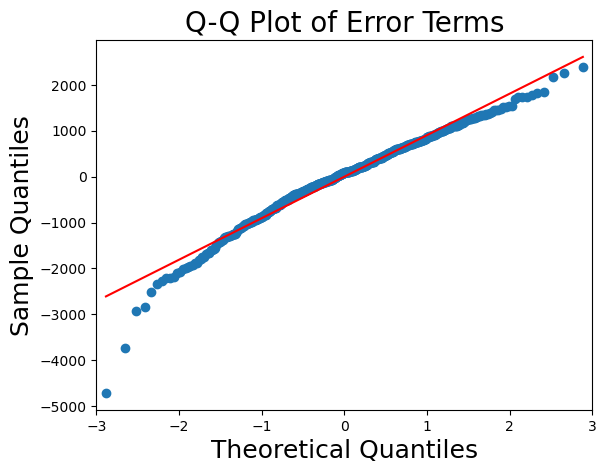

In [66]:
# Generate the Q-Q plot for error terms (residuals)
fig = sm.qqplot(res, line='s')
plt.title('Q-Q Plot of Error Terms', fontsize=20)
plt.xlabel('Theoretical Quantiles', fontsize=18)
plt.ylabel('Sample Quantiles', fontsize=18)
plt.show()                  

The error terms appear to be somewhat normally distributed in the Q-Q plot, which displays a pretty straight line with little variations. This bolsters the rationale for using normality in a precise linear regression study. Due to sample size and unpredictability, a few minor outliers are predicted, but overall, the data closely matches the theoretical normal distribution.

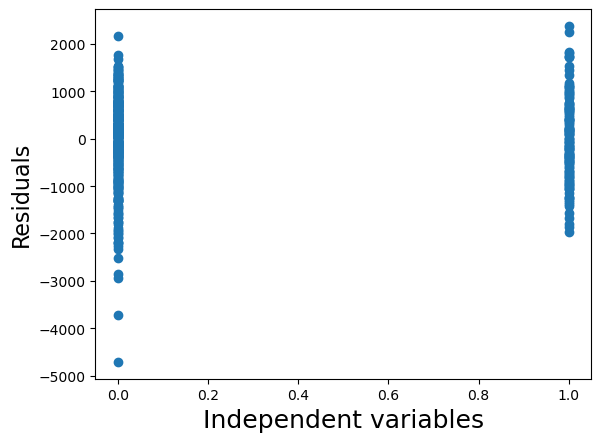

In [74]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(x_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

In [62]:
x_train.head()

,spring,winter,dec,july,nov,Saturday,Light rain_Light snow_Thunderstorm,Mist_cloudy,yr,holiday,workingday,windspeed
653,1,0,0,0,0,0,0,0,0,0,1,0.503226
576,1,0,0,0,0,0,0,0,1,0,1,0.396774
426,0,0,0,0,0,0,0,1,0,0,0,0.122581
728,1,0,0,0,0,0,1,0,0,0,1,0.538710
482,0,0,0,0,0,0,0,0,0,0,0,0.064516


In [63]:
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.4
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          3.37e-155
Time:                        09:33:21   Log-Likelihood:                -4203.5
No. Observations:                 511   AIC:                             8433.
Df Residuals:                     498   BIC:                             8488.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [64]:
round(res3.params,4)

const                                 4585.6102
spring                               -2344.5444
winter                                 115.0120
dec                                   -974.2681
july                                    14.5886
nov                                  -1040.6562
Saturday                               420.9365
Light rain_Light snow_Thunderstorm   -2532.5726
Mist_cloudy                           -919.4710
yr                                    2075.7239
holiday                               -351.4005
workingday                             470.7770
windspeed                            -1424.4935
dtype: float64

### We can see that the equation for best fitted line is:

### cnt = 4585.6102 - (2344.5444 x spring) + (115.0120 x winter)  - (974.2681 x dec)  + (14.5886 x July) – (1040.6562 x nov) + (420.9365 x Saturday)- (2532.5726 x Light rain_Light snow_Thunderstorm)  - (919.4710 x Mist_cloudy)  + (2075.7239 x yr)  - (351.4005 x holiday)  + (470.7770 x workingday)  - (1424.4935 x windspeed) 

### We can see the demand for bikes depends mainly on below variables: spring , winter, December , July , November , Saturday , Light rain_Light snow_Thunderstorm , Mist_cloudy , yr , holiday , windspeed, workingday.


### ------------------------------------------END-----------------------------------------------------------